Cargando y explorando los datos

In [ ]:
import pandas as pd # importa la librería pandas y la asigna a la variable pd

In [ ]:
datos_consumo = pd.read_excel('datos.xlsx') # indicamos el nombre de nuestro archivo a ser leído

In [ ]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
0,2021-08-12,Desayuno,Sandwich,339,25.75,17.54,18.76,1323,Calorías en Sánduche de Jamón y Queso con Lech...
1,2021-08-12,Comida,Pollo,109,0.00,5.66,13.49,46,Calorías en Muslos de Pollo (Asados o Cocidos)...
2,2021-08-12,Cena,Quesadillas,171,10.53,9.09,9.50,409,Calorías en Quesadilla e Información Nutricion...
3,2021-08-13,Desayuno,Huevo con salchicha,188,17.34,9.69,8.16,537,"huevo con salchicha Ingredientes, Calorías e I..."
4,2021-08-13,Snack,Pay de Nuez Marinela,297,40.60,13.00,4.40,242,Calorías en Marinela Pay con Nuez e Informació...


In [ ]:
datos_consumo.groupby("Momento").count() # con la función groupby agrupamos los datos de la columna Momento y con count() los contamos para obtener subtotales

,Fecha (dd/mm/aa),Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
Momento,,,,,,,,
Cena,94,94,94,94,94,94,94,94
Comida,95,95,95,95,95,95,95,95
Desayuno,95,95,95,95,95,95,95,95
Snack,31,31,31,31,31,31,31,31


In [ ]:
datos_consumo.describe()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
count,315.000000,315.000000,315.000000,315.000000,315.000000
mean,204.730159,19.570286,9.501302,10.347270,318.892063
std,101.168020,13.576421,7.218519,7.911686,300.103063
min,42.000000,0.000000,0.230000,0.360000,0.000000
25%,131.000000,9.840000,5.280000,5.800000,65.000000
50%,181.000000,17.340000,8.700000,9.280000,262.000000
75%,287.000000,29.620000,12.750000,13.490000,496.000000
max,640.000000,52.600000,33.920000,64.000000,1323.000000


Seleccionando los datos

In [ ]:
datos_seleccionados = datos_consumo.iloc[:,3:8] # : selecciona todas las filas y 3:8(-1) seleccion columnas de la 4 la 7

In [ ]:
datos_seleccionados # desplegamos el dataframe

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,339,25.75,17.54,18.76,1323
1,109,0.00,5.66,13.49,46
2,171,10.53,9.09,9.50,409
3,188,17.34,9.69,8.16,537
4,297,40.60,13.00,4.40,242
...,...,...,...,...,...
310,365,8.17,29.97,17.29,496
311,109,0.00,5.66,13.49,46
312,105,17.90,1.90,4.00,0
313,140,10.07,7.86,8.13,459


In [ ]:
datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calorías (kcal)     315 non-null    int64  
 1   Carbohidratos (g)   315 non-null    float64
 2   Lípidos/grasas (g)  315 non-null    float64
 3   Proteína (g)        315 non-null    float64
 4   Sodio (mg)          315 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 12.4 KB


Limpiando los datos

In [ ]:
datos_seleccionados.isnull().values.any() # buscamos valores nulos y obtenemos True o False dependiendo si hay o no

False

In [ ]:
dataset = datos_seleccionados.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

In [ ]:
dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

Calorías (kcal)       0
Carbohidratos (g)     0
Lípidos/grasas (g)    0
Proteína (g)          0
Sodio (mg)            0
dtype: int64

Preparando los datos

In [ ]:
dataset.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

Index(['Calorías (kcal)', 'Carbohidratos (g)', 'Lípidos/grasas (g)',
       'Proteína (g)', 'Sodio (mg)'],
      dtype='object')

In [ ]:
X = dataset[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']].values # variables independientes

In [ ]:
y = dataset['Calorías (kcal)'].values # variable dependiente

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

Modelación de los datos

In [ ]:
from sklearn.linear_model import LinearRegression # importamos la clase de regresión lineal

In [ ]:
modelo_regresion = LinearRegression() # modelo de regresión

In [ ]:
modelo_regresion.fit(X_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [ ]:
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']

In [ ]:
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])

In [ ]:
coeff_df # despliega los coefientes y sus valores; por cada unidad del coeficente, su impacto en las calorías será igual a su valor

,Coeficientes
Carbohidratos (g),3.924392
Lípidos/grasas (g),8.810111
Proteína (g),4.363945
Sodio (mg),0.001181


In [ ]:
y_pred = modelo_regresion.predict(X_test) # probamos nuestro modelo con los valores de prueba

In [ ]:
validacion = pd.DataFrame({'Real': y_test, 'Prediction': y_pred, 'Difference': y_test-y_pred}) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion = validacion.head(25) # elegimos una muestra con 25 valores 

muestra_validacion # desplegamos esos 25 valores 

,Real,Prediction,Difference
0,52,55.057033,-3.057033
1,287,288.737058,-1.737058
2,359,355.898297,3.101703
3,142,144.001182,-2.001182
4,181,178.561484,2.438516
5,287,288.737058,-1.737058
6,142,144.001182,-2.001182
7,270,270.534354,-0.534354
8,213,212.766694,0.233306
9,173,170.986692,2.013308


In [ ]:
validacion["Difference"].describe()

count    63.000000
mean     -1.131035
std       4.963709
min     -28.093786
25%      -3.057033
50%      -0.578777
75%       1.764616
max       8.735888
Name: Difference, dtype: float64

In [ ]:
from sklearn.metrics import r2_score # importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y_test, y_pred) # ingresamos nuestros valores reales y calculados

0.9973903774969742

Visualización de los datos

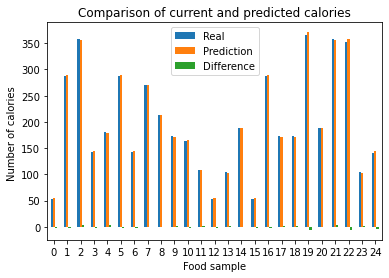

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("Comparison of current and predicted calories") # indicamos el título del gráfico

plt.xlabel("Food sample") # indicamos la etiqueta del eje de las x, los alimentos

plt.ylabel("Number of calories ") # indicamos la etiqueta del eje de las y, la cantidad de calorías

plt.show() # desplegamos el gráfico